In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_raw = pd.read_csv("google-analytics.csv")

/opt/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_raw.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [4]:
#1. Read CSV and Convert/Flatten JSON fields

In [5]:
#There are a couple of columns in JSON format, which needs to be flattened

import os
import json
from pandas import json_normalize

def load_df(csv_path="google-analytics.csv", nrows=None):
    json_columns = ['device', 'geoNetwork', 'totals', 'trafficSource']
    df = pd.read_csv(csv_path, 
                    converters={column: json.loads for column in json_columns},
                    dtype={'fullVisitorID':'str'},
                    nrows=nrows)
    for column in json_columns:
        column_converted = json_normalize(df[column])
        column_converted.columns = [f"{column}_{subcolumn}" for subcolumn in column_converted.columns]
        df = df.drop(column, axis=1).merge(column_converted, right_index=True, left_index=True)
    return df

In [6]:
df = load_df()

/opt/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,...,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent,trafficSource_campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#2. Explanatory Data Analysis (EDA)

In [9]:
df.shape

(903653, 55)

In [10]:
df.isna().sum()

channelGrouping                                           0
date                                                      0
fullVisitorId                                             0
sessionId                                                 0
socialEngagementType                                      0
visitId                                                   0
visitNumber                                               0
visitStartTime                                            0
device_browser                                            0
device_browserVersion                                     0
device_browserSize                                        0
device_operatingSystem                                    0
device_operatingSystemVersion                             0
device_isMobile                                           0
device_mobileDeviceBranding                               0
device_mobileDeviceModel                                  0
device_mobileInputSelector              

In [11]:
df = df.loc[:,['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 
              'visitId', 'visitNumber', 'device_browser', 'device_operatingSystem', 
              'device_isMobile', 'geoNetwork_country', 'trafficSource_source',
              'totals_visits', 'totals_hits', 'totals_pageviews', 'totals_bounces',
              'totals_transactionRevenue']]

In [12]:
df = df.fillna(value=0)

In [13]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,device_browser,device_operatingSystem,device_isMobile,geoNetwork_country,trafficSource_source,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,Chrome,Windows,False,Turkey,google,1,1,1,1,0
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,Firefox,Macintosh,False,Australia,google,1,1,1,1,0
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,Chrome,Windows,False,Spain,google,1,1,1,1,0
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,UC Browser,Linux,False,Indonesia,google,1,1,1,1,0
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,Chrome,Android,True,United Kingdom,google,1,1,1,1,0


In [14]:
for i in df.columns:
    if df[i].dtype == object:
        df[i] = df[i].astype(str)

In [15]:
df.channelGrouping.unique()
df.channelGrouping = df.channelGrouping.replace("(Other)", "Others")

In [16]:
df.device_isMobile.unique()
df.device_isMobile = df.device_isMobile.astype(str)
df.loc[df.device_isMobile == "False", "device"] = "Desktop"
df.loc[df.device_isMobile == "True", "device"] = "Mobile"

In [17]:
df.geoNetwork_country.unique()
df.geoNetwork_country = df.geoNetwork_country.replace("(not set)", "Others")

In [18]:
pd.set_option('mode.chained_assignment', None)

df['traffic_source'] = df.trafficSource_source

main_traffic_source = ["google","baidu","bing","yahoo","facebook","youtube","duckduckgo","quora",
                      "reddit","linkedin","messenger","pinterest","yandex","twitter"]

df.traffic_source[df.traffic_source.str.contains("google")] = "google"
df.traffic_source[df.traffic_source.str.contains("baidu")] = "baidu"
df.traffic_source[df.traffic_source.str.contains("bing")] = "bing"
df.traffic_source[df.traffic_source.str.contains("yahoo")] = "yahoo"
df.traffic_source[df.traffic_source.str.contains("facebook")] = "facebook"
df.traffic_source[df.traffic_source.str.contains("youtube")] = "youtube"
df.traffic_source[df.traffic_source.str.contains("duckduckgo")] = "duckduckgo"
df.traffic_source[df.traffic_source.str.contains("quora")] = "quora"
df.traffic_source[df.traffic_source.str.contains("reddit")] = "reddit"
df.traffic_source[df.traffic_source.str.contains("linkedin")] = "linkedin"
df.traffic_source[df.traffic_source.str.contains("lnkd")] = "linkedin"
df.traffic_source[df.traffic_source.str.contains("messenger")] = "messenger"
df.traffic_source[df.traffic_source.str.contains("pinterest")] = "pinterest"
df.traffic_source[df.traffic_source.str.contains("yandex")] = "yandex"
df.traffic_source[df.traffic_source.str.contains("twitter")] = "twitter"
df.traffic_source[~df.traffic_source.isin(main_traffic_source)] = "Others"

In [19]:
df['deviceBrowser'] = df.device_browser

main_device_browser = ["Chrome","Safari","Firefox","Internet Explorer","Edge",
                      "Opera","UC Browser","YaBrowser","Coc Coc"]

df.deviceBrowser[df.deviceBrowser.str.contains("Chrome")] = "Chrome"
df.deviceBrowser[df.deviceBrowser.str.contains("Safari")] = "Safari"
df.deviceBrowser[df.deviceBrowser.str.contains("Firefox")] = "Firefox"
df.deviceBrowser[df.deviceBrowser.str.contains("Internet Explorer")] = "Internet Explorer"
df.deviceBrowser[df.deviceBrowser.str.contains("Edge")] = "Edge"
df.deviceBrowser[df.deviceBrowser.str.contains("Opera")] = "Opera"
df.deviceBrowser[df.deviceBrowser.str.contains("UC Browser")] = "UC Browser"
df.deviceBrowser[df.deviceBrowser.str.contains("YaBrowser")] = "YaBrowser"
df.deviceBrowser[df.deviceBrowser.str.contains("Coc Coc")] = "Coc Coc"
df.deviceBrowser[~df.deviceBrowser.isin(main_device_browser)] = "Others"

In [20]:
df.device_operatingSystem.unique()
df.device_operatingSystem = df.device_operatingSystem.replace("(not set)", "Others")

In [21]:
df.drop(columns=["device_isMobile"], inplace=True)

In [22]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,device_browser,device_operatingSystem,geoNetwork_country,trafficSource_source,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue,device,traffic_source,deviceBrowser
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,Chrome,Windows,Turkey,google,1,1,1,1,0,Desktop,google,Chrome
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,Firefox,Macintosh,Australia,google,1,1,1,1,0,Desktop,google,Firefox
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,Chrome,Windows,Spain,google,1,1,1,1,0,Desktop,google,Chrome
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,UC Browser,Linux,Indonesia,google,1,1,1,1,0,Desktop,google,UC Browser
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,Chrome,Android,United Kingdom,google,1,1,1,1,0,Mobile,google,Chrome


In [23]:
columns_to_numeric = ['totals_visits', 'totals_hits', 'totals_pageviews', 'totals_bounces', 'totals_transactionRevenue']

for i in columns_to_numeric:
    df[i] = pd.to_numeric(df[i])

In [24]:
df_groupby = df.groupby(['fullVisitorId', 'channelGrouping', 'geoNetwork_country', 'traffic_source',
                         'device', 'deviceBrowser', 'device_operatingSystem']).agg({
                        'totals_hits':'sum', 'totals_pageviews':'sum', 'totals_bounces':'sum',
                        'totals_transactionRevenue':'sum'}).reset_index()

In [25]:
df_groupby = df_groupby.sort_values(by='totals_transactionRevenue', ascending=False).reset_index(drop=True)

In [26]:
df_groupby.head()

,fullVisitorId,channelGrouping,geoNetwork_country,traffic_source,device,deviceBrowser,device_operatingSystem,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue
0,1957458976293878100,Display,United States,Others,Desktop,Firefox,Windows,2378,1998,4,59257930000
1,1957458976293878100,Direct,United States,Others,Desktop,Firefox,Windows,1370,1134,3,17855500000
2,5632276788326171571,Direct,United States,Others,Desktop,Chrome,Windows,153,105,2,16023750000
3,9417857471295131045,Direct,United States,Others,Desktop,Chrome,Windows,696,466,0,15170120000
4,4471415710206918415,Referral,United States,google,Desktop,Chrome,Macintosh,238,194,6,11211100000


In [27]:
df_groupby.totals_transactionRevenue = df_groupby.totals_transactionRevenue.apply(lambda x: round(x/100000,-1))

In [28]:
df_groupby.describe()

,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue
count,740917.000000,740917.000000,740917.000000,740917.000000
mean,5.606127,4.694812,0.608206,20.787227
std,16.399311,12.439451,0.845341,911.597635
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,1.000000,0.000000
75%,4.000000,4.000000,1.000000,0.000000
max,2912.000000,2318.000000,123.000000,592580.000000


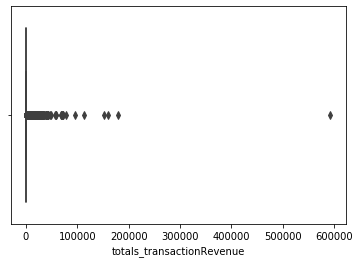

In [29]:
sns.boxplot(df_groupby.totals_transactionRevenue)

In [30]:
df_groupby = df_groupby.loc[df_groupby.totals_transactionRevenue < 200000]

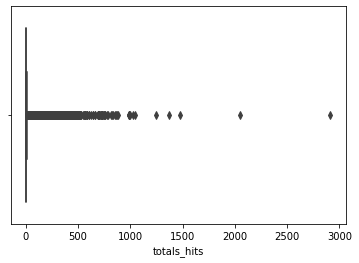

In [31]:
sns.boxplot(df_groupby.totals_hits)

In [32]:
df_groupby = df_groupby.loc[df_groupby.totals_hits < 1600]

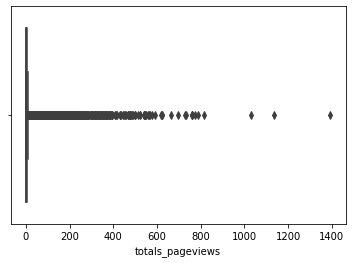

In [33]:
sns.boxplot(df_groupby.totals_pageviews)

In [34]:
df_groupby = df_groupby.loc[df_groupby.totals_pageviews < 1000]

In [35]:
df_groupby.shape

(740911, 11)

In [36]:
#3. Machine Learning Algorithm (K-Means)

In [37]:
from sklearn.cluster import KMeans

data = df_groupby.iloc[:, 7:]

kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(data)

labels = kmeans.predict(data)
labels = pd.DataFrame(data=labels, index = df_groupby.index, columns=["labels"])


In [38]:
df_kmeans = pd.concat([df_groupby, labels], axis=1)
df_kmeans = df_kmeans.reset_index(drop=True)
df_kmeans.head()

,fullVisitorId,channelGrouping,geoNetwork_country,traffic_source,device,deviceBrowser,device_operatingSystem,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue,labels
0,5632276788326171571,Direct,United States,Others,Desktop,Chrome,Windows,153,105,2,160240.0,1
1,9417857471295131045,Direct,United States,Others,Desktop,Chrome,Windows,696,466,0,151700.0,1
2,4471415710206918415,Referral,United States,google,Desktop,Chrome,Macintosh,238,194,6,112110.0,1
3,4984366501121503466,Direct,United States,Others,Desktop,Chrome,Chrome OS,724,540,4,95140.0,1
4,9029794295932939024,Referral,United States,google,Desktop,Chrome,Windows,782,566,3,78460.0,1


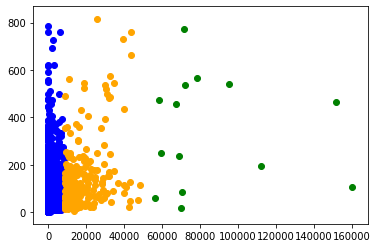

In [39]:
plt.scatter(df_kmeans.totals_transactionRevenue[df_kmeans.labels == 0],
            df_kmeans.totals_pageviews[df_kmeans.labels == 0], c='blue')

plt.scatter(df_kmeans.totals_transactionRevenue[df_kmeans.labels == 1],
            df_kmeans.totals_pageviews[df_kmeans.labels == 1], c='green')

plt.scatter(df_kmeans.totals_transactionRevenue[df_kmeans.labels == 2],
            df_kmeans.totals_pageviews[df_kmeans.labels == 2], c='orange')

plt.show()

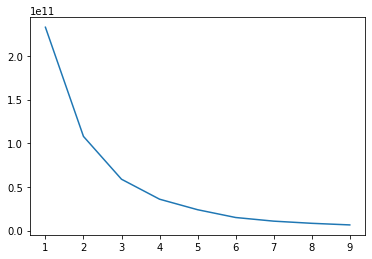

In [40]:
#Find the best number of clusters 

num_clusters = [x for x in range(1,10)]
inertia = []

for i in num_clusters:
    model = KMeans(n_clusters = i, init="k-means++")
    model.fit(data)
    inertia.append(model.inertia_)
    
plt.plot(num_clusters, inertia)
plt.show()

In [41]:
kmeans = KMeans(n_clusters=4, init="k-means++")
kmeans.fit(data)

labels_n4 = kmeans.predict(data)
labels_n4 = pd.DataFrame(data=labels_n4, index = df_groupby.index, columns=["labels"])

df_kmeans_n4 = pd.concat([df_groupby, labels_n4], axis=1)
df_kmeans_n4 = df_kmeans_n4.reset_index(drop=True)
df_kmeans_n4.head()

,fullVisitorId,channelGrouping,geoNetwork_country,traffic_source,device,deviceBrowser,device_operatingSystem,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue,labels
0,5632276788326171571,Direct,United States,Others,Desktop,Chrome,Windows,153,105,2,160240.0,1
1,9417857471295131045,Direct,United States,Others,Desktop,Chrome,Windows,696,466,0,151700.0,1
2,4471415710206918415,Referral,United States,google,Desktop,Chrome,Macintosh,238,194,6,112110.0,1
3,4984366501121503466,Direct,United States,Others,Desktop,Chrome,Chrome OS,724,540,4,95140.0,1
4,9029794295932939024,Referral,United States,google,Desktop,Chrome,Windows,782,566,3,78460.0,1


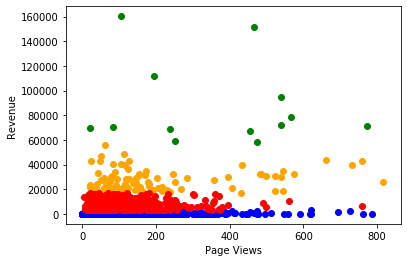

In [42]:
plt.scatter(df_kmeans_n4.totals_pageviews[df_kmeans_n4.labels == 0],
            df_kmeans_n4.totals_transactionRevenue[df_kmeans_n4.labels == 0], c='blue')

plt.scatter(df_kmeans_n4.totals_pageviews[df_kmeans_n4.labels == 1],
            df_kmeans_n4.totals_transactionRevenue[df_kmeans_n4.labels == 1], c='green')

plt.scatter(df_kmeans_n4.totals_pageviews[df_kmeans_n4.labels == 2],
            df_kmeans_n4.totals_transactionRevenue[df_kmeans_n4.labels == 2], c='orange')

plt.scatter(df_kmeans_n4.totals_pageviews[df_kmeans_n4.labels == 3],
            df_kmeans_n4.totals_transactionRevenue[df_kmeans_n4.labels == 3], c='red')

plt.xlabel("Page Views")
plt.ylabel("Revenue")

plt.show()


In [43]:
df_group0 = df_kmeans_n4.loc[df_kmeans_n4.labels == 0] #Customer Group 0: high lands - low revenue
df_group1 = df_kmeans_n4.loc[df_kmeans_n4.labels == 3] #Customer Group 1: medium lands - low revenue
df_group2 = df_kmeans_n4.loc[df_kmeans_n4.labels == 1] #Customer Group 2: medium lands - medium revenue
df_group3 = df_kmeans_n4.loc[df_kmeans_n4.labels == 2] #Customer Group 3: random lands - high revenue

In [44]:
df_group0.head()

,fullVisitorId,channelGrouping,geoNetwork_country,traffic_source,device,deviceBrowser,device_operatingSystem,totals_hits,totals_pageviews,totals_bounces,totals_transactionRevenue,labels
874,1708063999877429517,Referral,United States,google,Desktop,Chrome,Macintosh,86,67,1,3220.0,0
875,7845967413109542320,Referral,United States,google,Desktop,Chrome,Macintosh,70,54,0,3200.0,0
876,2838394030048546223,Display,United States,Others,Desktop,Chrome,Macintosh,49,41,0,3200.0,0
877,2324401088526343469,Direct,United States,Others,Desktop,Chrome,Macintosh,43,34,0,3200.0,0
878,2048511066419559359,Referral,United States,google,Desktop,Chrome,Macintosh,250,173,0,3200.0,0


Text(0.5, 1.0, 'Device Browser')

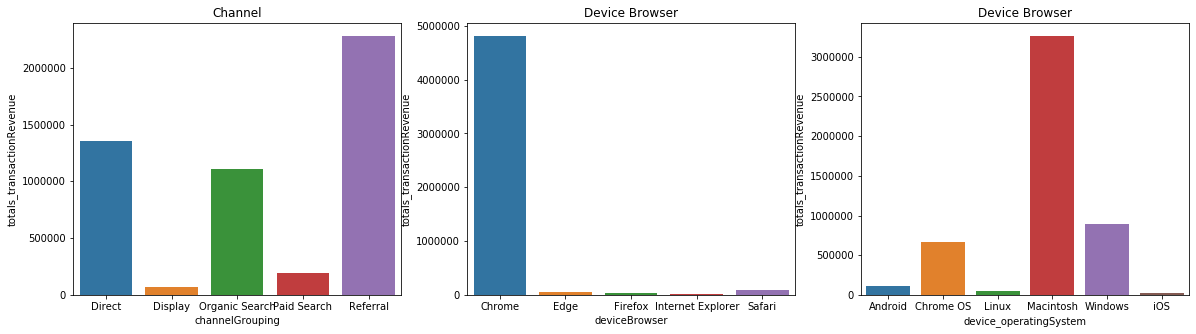

In [45]:
#Customer Group 1

df_group1_channel = df_group1.groupby('channelGrouping').totals_transactionRevenue.sum().reset_index()
df_group1_browser = df_group1.groupby('deviceBrowser').totals_transactionRevenue.sum().reset_index()
df_group1_os = df_group1.groupby('device_operatingSystem').totals_transactionRevenue.sum().reset_index()

fig, axes = plt.subplots(1,3,figsize=(20,5))

sns.barplot(ax=axes[0], x=df_group1_channel.channelGrouping, y=df_group1_channel.totals_transactionRevenue)
axes[0].set_title("Channel")

sns.barplot(ax=axes[1], x=df_group1_browser.deviceBrowser, y=df_group1_browser.totals_transactionRevenue)
axes[1].set_title("Device Browser")

sns.barplot(ax=axes[2], x=df_group1_os.device_operatingSystem, y=df_group1_os.totals_transactionRevenue)
axes[2].set_title("Device Browser")


Text(0.5, 1.0, 'Device Browser')

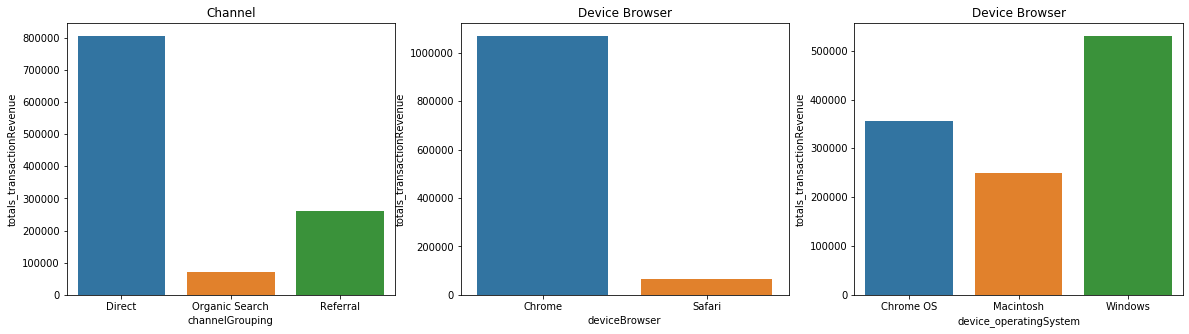

In [46]:
#Customer Group 2

df_group2_channel = df_group2.groupby('channelGrouping').totals_transactionRevenue.sum().reset_index()
df_group2_browser = df_group2.groupby('deviceBrowser').totals_transactionRevenue.sum().reset_index()
df_group2_os = df_group2.groupby('device_operatingSystem').totals_transactionRevenue.sum().reset_index()

fig, axes = plt.subplots(1,3,figsize=(20,5))

sns.barplot(ax=axes[0], x=df_group2_channel.channelGrouping, y=df_group2_channel.totals_transactionRevenue)
axes[0].set_title("Channel")

sns.barplot(ax=axes[1], x=df_group2_browser.deviceBrowser, y=df_group2_browser.totals_transactionRevenue)
axes[1].set_title("Device Browser")

sns.barplot(ax=axes[2], x=df_group2_os.device_operatingSystem, y=df_group2_os.totals_transactionRevenue)
axes[2].set_title("Device Browser")

In [47]:
#4. AB Testing 

In [54]:
df_group1_ab = df_group1.iloc[:, :-5]
df_group1_ab = df_group1_ab.reset_index(drop=True)
df_group1_ab.head()

df_group1_ab.shape

(776, 7)

In [71]:
df_group1_ab.loc[df_group1_ab.index >= 338, 'group'] = "control"
df_group1_ab.loc[df_group1_ab.index < 338, 'group'] = "test"

In [72]:
df_group1_ab.head()

,fullVisitorId,channelGrouping,geoNetwork_country,traffic_source,device,deviceBrowser,device_operatingSystem,group,revenue
0,4474580511359381331,Organic Search,United States,google,Desktop,Chrome,Windows,test,35282
1,2496439703637913793,Referral,United States,google,Desktop,Chrome,Macintosh,test,443158
2,047096740790346861,Organic Search,United States,google,Desktop,Chrome,Windows,test,391744
3,3751433429956400495,Organic Search,Kenya,google,Desktop,Chrome,Windows,test,24601
4,3921649958751416379,Paid Search,United States,google,Desktop,Chrome,Chrome OS,test,53396


In [73]:
df_group1_ab['revenue'] = np.random.randint(10000, 500000, size=776)

In [155]:
print(df_group1_ab.revenue.mean())

252994.34536082475


In [158]:
control_rev = df_group1_ab.loc[df_group1_ab.group == "control"].revenue
test_rev = df_group1_ab.loc[df_group1_ab.group == "test"].revenue

In [ ]:
#4.1. Significance test (2 variables)

#Step 1. Sample Sizing
#Step 2. Pre-requisite: Normality, Correlation and Variance Tests
#Step 3. Hypothesis Testing

In [159]:
#Step 1. Sample Sizing

#Effect Size: (expected mean - actual mean) / actual_std
effect_size = (280000 - df_group1_ab.revenue.mean())/df_group1_ab.revenue.std() #set expected mean to $350,000
print(effect_size)

#Power 

power = 0.9 #the probability of rejecting the null hypothesis

#Alpha 

alpha = 0.05 #the error rate 

0.1945333523060415


In [160]:
#Sample Size Calculation

import statsmodels.stats.power as sms

n = sms.TTestPower().solve_power(effect_size=effect_size, power=power, alpha=alpha)
print(n)

279.5843621361529


In [161]:
#Take the samples out of each group: control vs test

control_sample = np.random.normal(control_rev.mean(), control_rev.std(), size=279)
test_sample = np.random.normal(test_rev.mean(), test_rev.std(), size=279)

In [162]:
#Step 2. Pre-requisite: Normality, Correlation

from scipy.stats import shapiro, pearsonr

stat1, p1 = shapiro(control_sample)
stat2, p2 = shapiro(test_sample)

print(p1, p2)

stat3, p3 = pearsonr(control_sample, test_sample)
print(p3)

0.1297304332256317 0.5397829413414001
0.989963139892466


In [165]:
#Step 3. Hypothesis Testing

from scipy.stats import ttest_ind

tstat, p4 = ttest_ind(control_sample, test_sample)
print(p4)

0.35276946240719687


In [ ]:
#Bonus: Chi-Squared Test (correlation test)

In [175]:
df_group1_ab_rev_pivot = df_group1_ab_rev.pivot(columns='channelGrouping', index='group', values='revenue').reset_index()
df_group1_ab_rev_pivot = df_group1_ab_rev_pivot.set_index(df_group1_ab_rev_pivot.group)
df_group1_ab_rev_pivot = df_group1_ab_rev_pivot.drop(columns=["group"])
df_group1_ab_rev_pivot.head(10)

channelGrouping,Direct,Display,Organic Search,Paid Search,Referral
group,,,,,
control,25546857,1122185,28544822,5521741,50780957
test,24165708,1479145,17029461,2454727,39678009


In [179]:
df_group1_ab_rev_pivot_transpose = df_group1_ab_rev_pivot.transpose()
df_group1_ab_rev_pivot_transpose.head()

group,control,test
channelGrouping,,
Direct,25546857,24165708
Display,1122185,1479145
Organic Search,28544822,17029461
Paid Search,5521741,2454727
Referral,50780957,39678009


In [178]:
from scipy.stats import chi2_contingency

stat5, p5, dof, expected = chi2_contingency(df_group1_ab_rev_pivot_transpose)
print(p5)

0.0
